<a href="https://colab.research.google.com/github/GlezRuben/Machine-Learning/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression
Simple linear regression is used to model the relationship between two continuous variables. Often, the objective is to predict the value of an output variable (y) based on the value of an input (x) variable.


## Objectives

After completing this lab you will be able to:

*   Use scikit-learn to implement simple Linear Regression
*   Create a model, train it, test it and use the model

### Importing Needed packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Downloading Data


In [23]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00616/Tetuan%20City%20power%20consumption.csv'
df = pd.read_csv(path, index_col=False, header=0)

## Understanding the Data

### `Tetuan City power consumption.csv`:

We have downloaded the Power consumption of Tetouan city Data Set, **`Tetuan City power consumption.csv`**, which is is related to power consumption of three different distribution networks of Tetouan city which is located in north Morocco. [Dataset source](https://archive.ics.uci.edu/ml/datasets/Power+consumption+of+Tetouan+city)

*   **Date Time:** Each ten minutes.
*   **Temperature:** Weather Temperature of Tetouan city.
*   **Humidity:** Weather Humidity of Tetouan city.
*   **Wind Speed of Tetouan city.**
*   **general diffuse flows**
*   **diffuse flows**
*   **power consumption of zone 1 of Tetouan city.**
*   **power consumption of zone 2 of Tetouan city.**
*   **power consumption of zone 3 of Tetouan city.**

In [24]:
# take a look at the dataset
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


### Data Exploration

Let's first have a descriptive exploration on our data.

In [25]:
# summarize the data
df.describe()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


Let's select some features to explore more.

In [32]:
cdf = df[['Temperature','Humidity','Wind Speed','Zone 1 Power Consumption']]
cdf.rename(columns={"Wind Speed": "Wind_Speed", "Zone 1 Power Consumption": "Zone_1_Power_Consumption"}, inplace=True)
cdf.head(9)

<ipython-input-32-6ce5785b4a96>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf.rename(columns={"Wind Speed": "Wind_Speed", "Zone 1 Power Consumption": "Zone_1_Power_Consumption"}, inplace=True)


,Temperature,Humidity,Wind_Speed,Zone_1_Power_Consumption
0,6.559,73.8,0.083,34055.69620
1,6.414,74.5,0.083,29814.68354
2,6.313,74.5,0.080,29128.10127
3,6.121,75.0,0.083,28228.86076
4,5.921,75.7,0.081,27335.69620
5,5.853,76.9,0.081,26624.81013
6,5.641,77.7,0.080,25998.98734
7,5.496,78.2,0.085,25446.07595
8,5.678,78.1,0.081,24777.72152


We can plot each of these features:


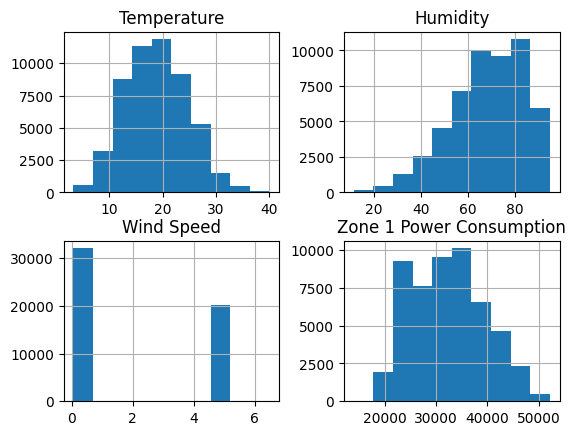

In [28]:
viz = cdf[['Temperature','Humidity','Wind_Speed','Zone_1_Power_Consumption']]
viz.hist()
plt.show()

Now, let's plot each of these features against the Zone 1 Power Consumption, to see how linear their relationship is:


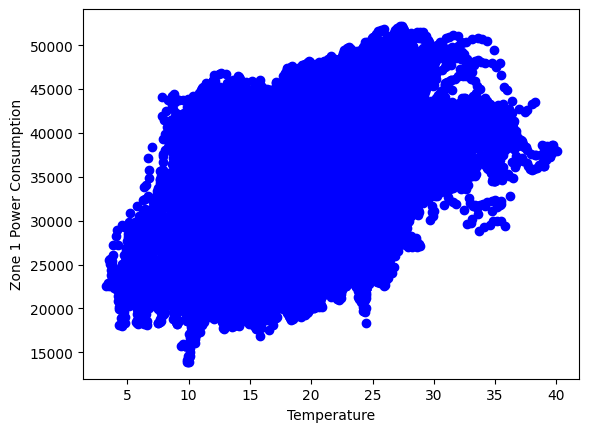

In [37]:
plt.scatter(cdf.Temperature, cdf.Zone_1_Power_Consumption,  color='blue')
plt.xlabel("Temperature")
plt.ylabel("Zone 1 Power Consumption")
plt.show()

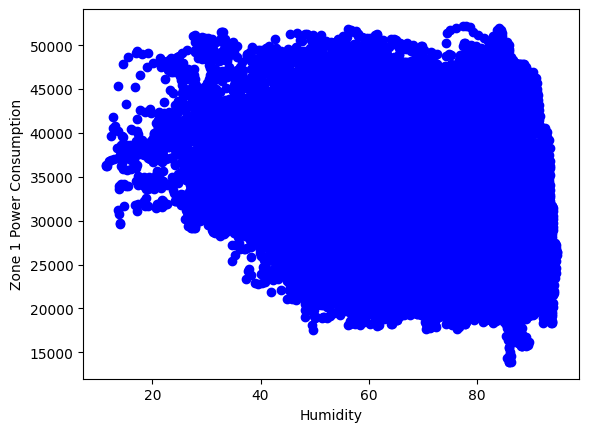

In [38]:
plt.scatter(cdf.Humidity, cdf.Zone_1_Power_Consumption,  color='blue')
plt.xlabel("Humidity")
plt.ylabel("Zone 1 Power Consumption")
plt.show()

#### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using **np.random.rand()** function:

In [39]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

### Simple Regression Model

Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation.

#### Train data distribution

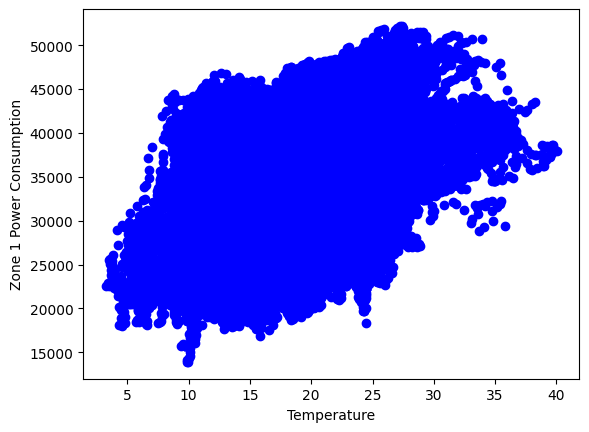

In [40]:
plt.scatter(train.Temperature, train.Zone_1_Power_Consumption,  color='blue')
plt.xlabel("Temperature")
plt.ylabel("Zone 1 Power Consumption")
plt.show()

#### Modeling

Using sklearn package to model data.

In [42]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Temperature']])
train_y = np.asanyarray(train[['Zone_1_Power_Consumption']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[537.36633938]]
Intercept:  [22231.04141215]


As mentioned before, **Coefficient** and **Intercept** in the simple linear regression, are the parameters of the fit line.
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data.
Notice that all of the data must be available to traverse and calculate the parameters.

#### Plot outputs

We can plot the fit line over the data:

Text(0, 0.5, 'Zone 1 Power Consumption')

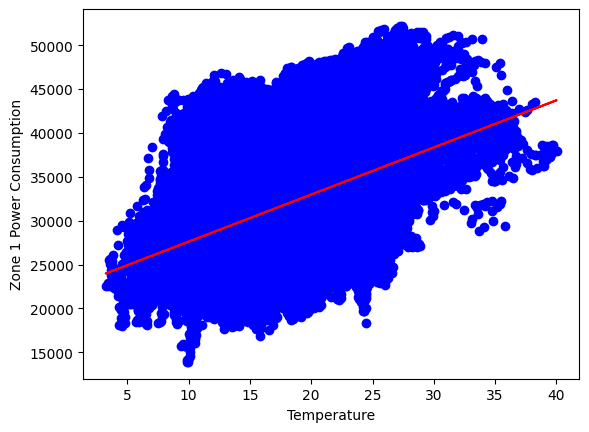

In [43]:
plt.scatter(train.Temperature, train.Zone_1_Power_Consumption,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Temperature")
plt.ylabel("Zone 1 Power Consumption")

#### Evaluation

We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

*   Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.

*   Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean Absolute Error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.

*   Root Mean Squared Error (RMSE).

*   R-squared is not an error, but rather a popular metric to measure the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [44]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Temperature']])
test_y = np.asanyarray(test[['Zone_1_Power_Consumption']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 5283.94
Residual sum of squares (MSE): 41591972.89
R2-score: 0.20


## Exercise

Lets see what the evaluation metrics are if we trained a regression model using the `Humidity` feature.

Start by selecting `Humidity` as the train_x data from the `train` dataframe, then select `Humidity` as the test_x data from the `test` dataframe

In [45]:
train_x = np.asanyarray(train[['Humidity']])
test_x = np.asanyarray(test[['Humidity']])

Now train a Linear Regression Model using the `train_x` you created and the `train_y` created previously

In [47]:
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-132.49128899]]
Intercept:  [41376.36411719]


Find the predictions using the model's `predict` function and the `test_x` data


In [48]:
predictions = regr.predict(test_x)

Text(0, 0.5, 'Zone 1 Power Consumption')

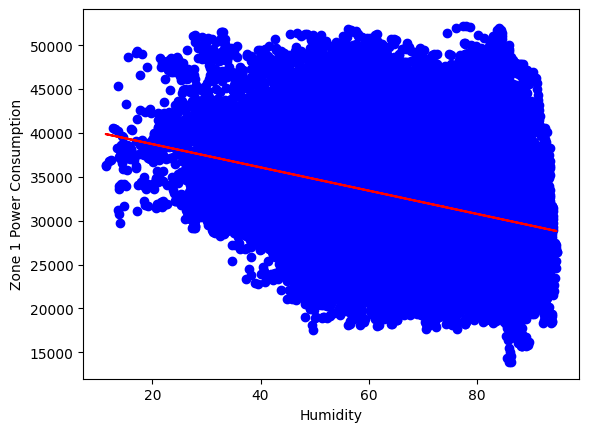

In [50]:
plt.scatter(train.Humidity, train.Zone_1_Power_Consumption,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Humidity")
plt.ylabel("Zone 1 Power Consumption")

Finally use the `predictions` and the `test_y` data and find the Mean Absolute Error value using the `np.absolute` and `np.mean` function like done previously

In [51]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(predictions - test_y)))

Mean absolute error: 5688.27


We can see that the MAE is much worse when we train using `Humidity` than `Temperature`.

---

